In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
df = pd.read_csv('train.csv')
df = reduce_mem_usage(df)
df.index = pd.DatetimeIndex(df.timestamp)

Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 173.90 MB
Decreased by 71.8%


In [12]:
subset = df[['building_id', 'meter']].drop_duplicates().values
np.random.shuffle(subset)
start = np.random.randint(subset.shape[0] - 100)
subset = subset[start:(start + 100)]
subset = [(651, 0)]

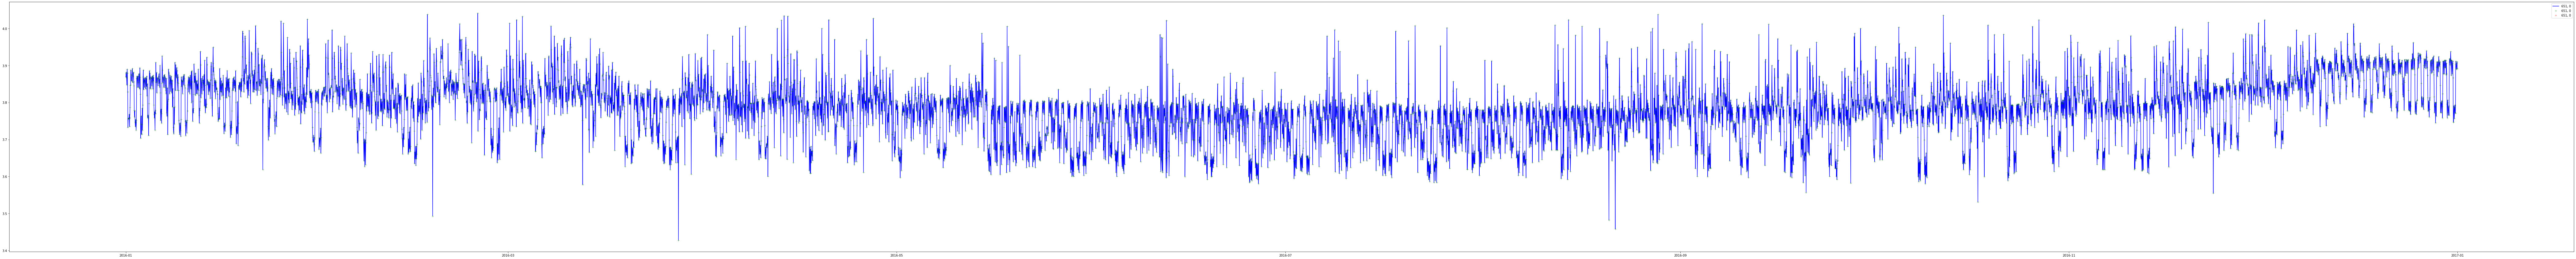

In [15]:
for building_id, meter in subset:
   
    where = (df.building_id == building_id) & (df.meter == meter)
    data = df[where].meter_reading
    data = np.log1p(data)
    label = '{}, {}'.format(building_id, meter)
    
    plt.figure(figsize=[150, 15])
    plt.plot(data, 'b', label=label)
    plt.plot(data, 'g+', alpha=0.5, label=label)
    where = data.rolling(24, center=True).std() < 1e-4
    plt.plot(data[where], 'r+', alpha=0.5, label=label)
    plt.legend()
    
plt.show()